In [43]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [44]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [45]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [46]:
path_local_csv = '/Users/mharias/Documents/proyectos/covid/vacunacion/csv/'
#path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [47]:
#datos_row = pd.read_csv(path_escovid19data_csv)

In [48]:
datos_row = pd.read_csv(path_local_csv+'estado_vacunacion_.csv')

In [49]:
dia = '23/3/21' # dia del informe
dia = datetime.today().strftime(format='%d/%-m/%y')

In [50]:
dia

'31/3/21'

In [51]:
datos_row

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,140295,25809,0.183962,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,23715,2004,0.084503,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,23720,9380,0.395447,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,8940,153,0.017114,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,20835,4846,0.232589,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,31/3/21,País Vasco,314550.0,52900.0,100200.0,467650,370971,0.793266,105534.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1222,31/3/21,Ceuta,7830.0,1300.0,3900.0,13030,11226,0.861550,3601.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1223,31/3/21,Melilla,7830.0,1200.0,3900.0,12930,10413,0.805336,2423.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1224,31/3/21,Fuerzas Armadas,19500.0,0.0,36100.0,55600,37606,0.676367,4991.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [52]:
datos_row = datos_row[datos_row['ccaa']!='Fuerzas Armadas']

<ipython-input-53-031e0322508d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-53-031e0322508d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


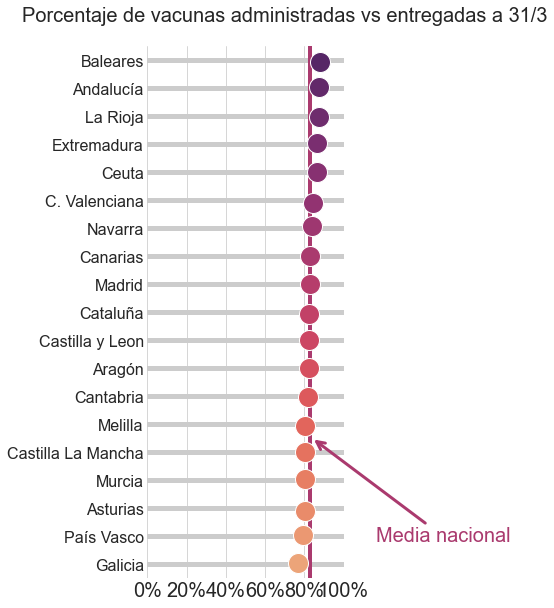

In [53]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()

#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=4,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,13.5), va='center', xytext=(media*1.4,17),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)
g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

g.fig.savefig(path_img+'estado_vacunas_comunidad.png',bbox_inches = 'tight',dpi=144)

<ipython-input-54-fb904f333c97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-54-fb904f333c97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


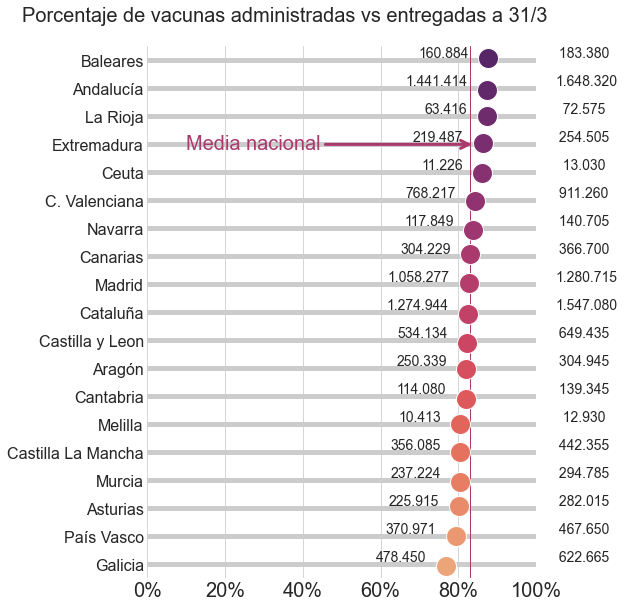

In [54]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')



# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,3), va='center', 
            xytext=(0.1,3),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    ax.text(s='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis administradas'].values[0]).replace(',','.'), 
            x=datos.loc[datos['ccaa']==i.get_text(),'% sobre entregadas']-0.05,
            y=i.get_position()[1]-.1,
            horizontalalignment='right',
           fontsize=14)
    ax.text(s='{:>8,d}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0]).replace(',','.'), 
            x=1+.05,
            y=i.get_position()[1]-.1,
            fontsize=14)


g.fig.savefig(path_img+'estado_vacunas_comunidad_connumeros.png',bbox_inches = 'tight',dpi=144)

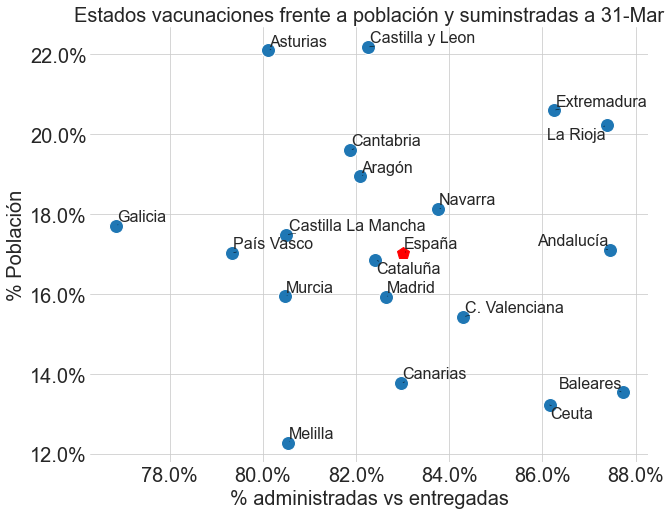

In [55]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
vacunas_poblacion = datos['Dosis administradas'].sum()/datos['poblacion'].sum()


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='vacunas_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'vacunas_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,vacunas_poblacion, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,vacunas_poblacion,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('% Población',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones frente a población y suminstradas a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig(path_img+'estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


Ciclos terminados..

<ipython-input-56-ac4fe56e73b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-56-ac4fe56e73b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


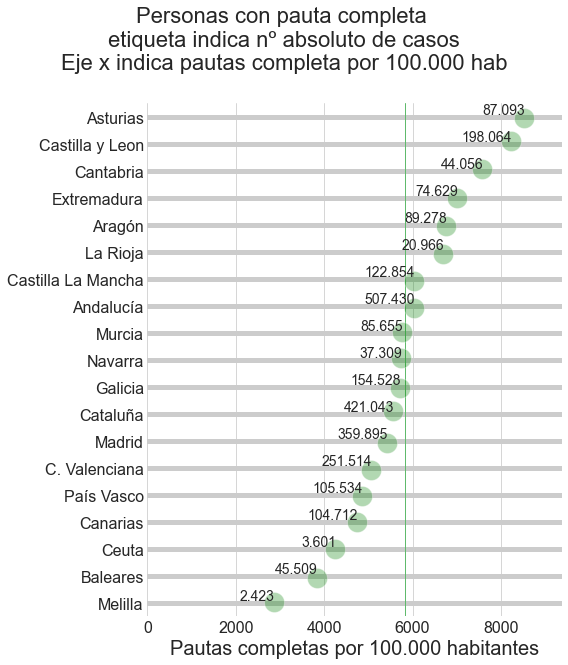

In [56]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Personas con pauta completa \n etiqueta indica nº absoluto de casos \nEje x indica pautas completa por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']

colores = sns.color_palette("Greens_r",19)
media = datos['pauta_poblacion'].mean()
mas_cercano =  abs(datos['pauta_poblacion']-media).idxmin()
indice_color_media = datos.sort_values('pauta_poblacion',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('pauta_poblacion',ascending=False),
                 x_vars='pauta_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['pauta_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('Pautas completas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Total pauta completada'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'pauta_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig(path_img+'estado_pautas_comunidad_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

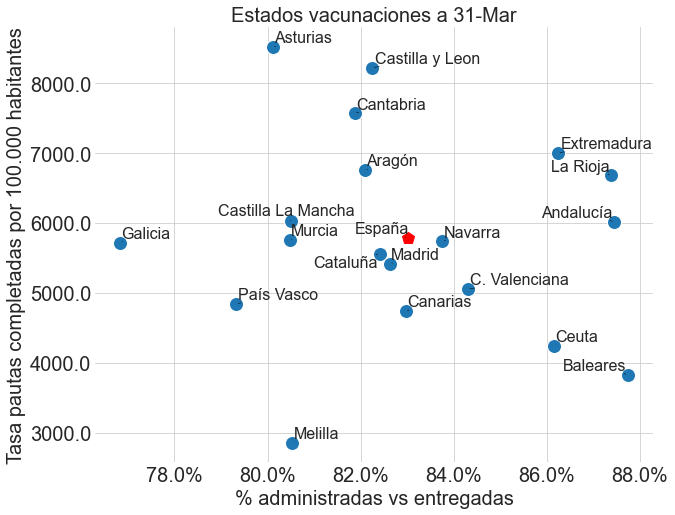

In [57]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%-d-%b')

datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
pauta_espanna = datos['Total pauta completada'].sum()/datos['poblacion'].sum()*100000


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='pauta_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1f}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'pauta_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,pauta_espanna, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,pauta_espanna,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('Tasa pautas completadas por 100.000 habitantes',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig(path_img+'estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


# Vacunas por poblacion

In [58]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
1205,31/3/21,Andalucía,1098720.0,168000.0,381600.0,1648320,1441414,0.874475,507430.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,0.171059,6021.903766
1206,31/3/21,Aragón,209745.0,35300.0,59900.0,304945,250339,0.820932,89278.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,0.189537,6759.418956
1207,31/3/21,Asturias,203315.0,32700.0,46000.0,282015,225915,0.801074,87093.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,0.220989,8519.377517
1208,31/3/21,Baleares,112680.0,18000.0,52700.0,183380,160884,0.877326,45509.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,0.135447,3831.362466
1209,31/3/21,Canarias,232800.0,35800.0,98100.0,366700,304229,0.829640,104712.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,0.137833,4744.056451
1210,31/3/21,Cantabria,97845.0,15300.0,26200.0,139345,114080,0.818687,44056.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,0.196120,7573.871724
1211,31/3/21,Castilla y Leon,463035.0,78300.0,108100.0,649435,534134,0.822460,198064.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,0.221809,8224.965668
1212,31/3/21,Castilla La Mancha,300555.0,49600.0,92200.0,442355,356085,0.804976,122854.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,0.174937,6035.553831
1213,31/3/21,Cataluña,1027880.0,168400.0,350800.0,1547080,1274944,0.824097,421043.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,0.168530,5565.598018
1214,31/3/21,C. Valenciana,586360.0,96800.0,228100.0,911260,768217,0.843027,251514.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,0.154432,5056.091346


<ipython-input-59-cc68d0205274>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-59-cc68d0205274>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-59-cc68d0205274>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

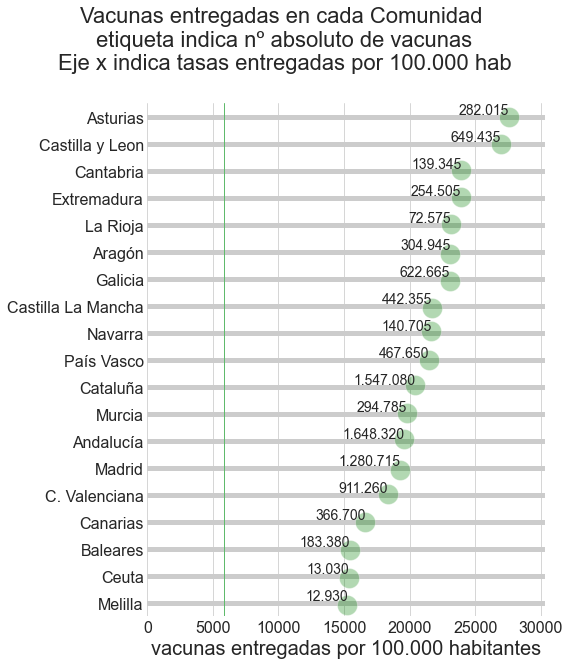

In [59]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
colores = sns.color_palette("Greens_r",19)

g = sns.PairGrid(datos.sort_values('vacunas_poblacion',ascending=False),
                 x_vars='vacunas_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['vacunas_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('vacunas entregadas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'vacunas_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig(path_img+'entregadas_poblacion_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

In [60]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
1205,31/3/21,Andalucía,1098720.0,168000.0,381600.0,1648320,1441414,0.874475,507430.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,19561.366917,6021.903766
1206,31/3/21,Aragón,209745.0,35300.0,59900.0,304945,250339,0.820932,89278.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,23088.006154,6759.418956
1207,31/3/21,Asturias,203315.0,32700.0,46000.0,282015,225915,0.801074,87093.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,27586.513847,8519.377517
1208,31/3/21,Baleares,112680.0,18000.0,52700.0,183380,160884,0.877326,45509.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,15438.600036,3831.362466
1209,31/3/21,Canarias,232800.0,35800.0,98100.0,366700,304229,0.829640,104712.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,16613.621176,4744.056451
1210,31/3/21,Cantabria,97845.0,15300.0,26200.0,139345,114080,0.818687,44056.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,23955.446600,7573.871724
1211,31/3/21,Castilla y Leon,463035.0,78300.0,108100.0,649435,534134,0.822460,198064.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,26968.962449,8224.965668
1212,31/3/21,Castilla La Mancha,300555.0,49600.0,92200.0,442355,356085,0.804976,122854.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,21731.953496,6035.553831
1213,31/3/21,Cataluña,1027880.0,168400.0,350800.0,1547080,1274944,0.824097,421043.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,20450.228080,5565.598018
1214,31/3/21,C. Valenciana,586360.0,96800.0,228100.0,911260,768217,0.843027,251514.0,NaN,30/3/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,18318.717051,5056.091346


<ipython-input-61-859b4973be5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-61-859b4973be5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-61-859b4973be5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

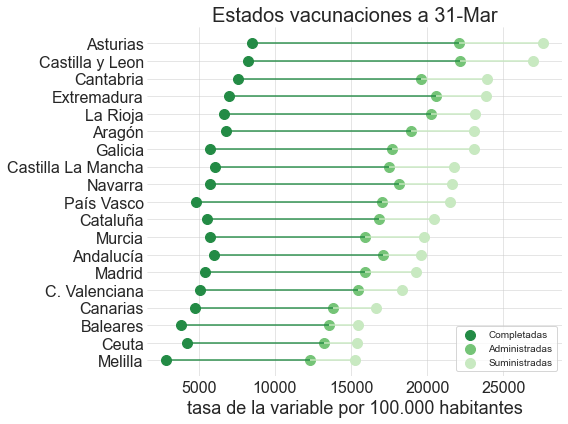

In [61]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['tasa_administradas']=100000*datos['Dosis administradas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
datos=datos.sort_values('vacunas_poblacion')

colores = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 6))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores[2], alpha=1, s=100,label='Suministradas')


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=100)


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


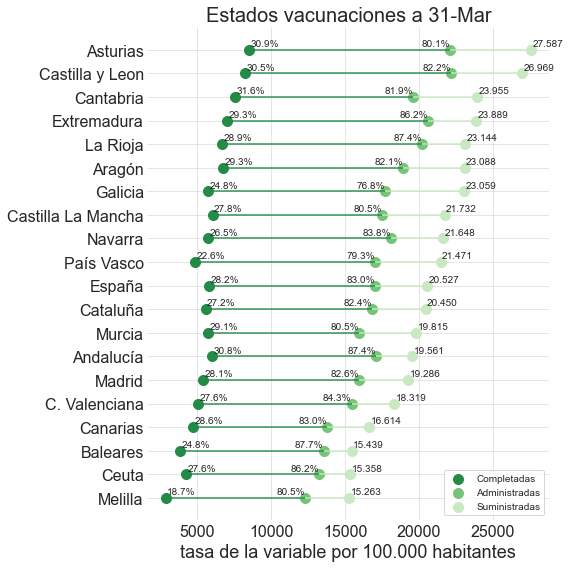

In [62]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']

poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 8))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores_bolas[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores_bolas[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores_bolas[2], alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas'],
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=144)


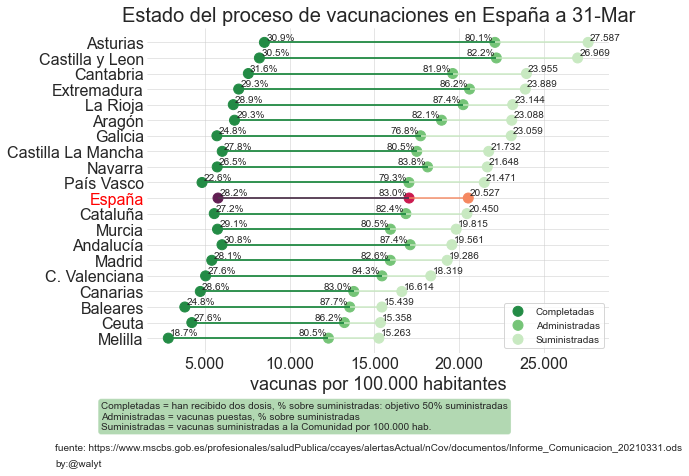

In [81]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= 'Estado del proceso de vacunaciones en España'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']
autor='@walyt'
fuente ='fuente: https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210331.ods'
poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)
colores_rojos = sns.color_palette('rocket',3)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)


c = [colores_bolas[0]  if datos.loc[i,'ccaa']!='España' else colores_rojos[0] for i in datos.index]
ax.scatter(datos['pauta_poblacion'], my_range, color=c, alpha=1 ,s=100, label='Completadas')
ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=c,linewidth=2, alpha=0.7)
c = [colores_bolas[1]  if datos.loc[i,'ccaa']!='España' else colores_rojos[1] for i in datos.index]
ax.scatter(datos['tasa_administradas'], my_range, color=c, alpha=1 ,s=100, label='Administradas')

c = [colores_bolas[2]  if datos.loc[i,'ccaa']!='España' else colores_rojos[2] for i in datos.index]
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=c,linewidth=2, alpha=0.7)
ax.scatter(datos['vacunas_poblacion'], my_range, color=c, alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas']-100,
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)

datos[datos['ccaa']=='']
ax.get_yticklabels()[datos.index.get_loc(datos[datos['ccaa']=='España'].index.values[0])].set_color("red")


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v).replace(',','.')))

ax.set_title(title+' a {}'.format(today),fontsize=20)

ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

textstr = '\n'.join((
    'Completadas = han recibido dos dosis, % sobre suministradas: objetivo 50% suministradas',
     'Administradas = vacunas puestas, % sobre suministradas',
    'Suministradas = vacunas suministradas a la Comunidad por 100.000 hab.',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.3)

# place a text box in upper left in axes coords .65, .35
ax.text(-.2,-.3,fuente,transform=ax.transAxes, fontsize=10,ha='left')
ax.text(-.1, -.15, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
ax.text(-.2,-.35,'by:'+autor, transform=ax.transAxes, fontsize=10)
f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=144)


In [ ]:
datos

In [ ]:
datos

## Dashboard

In [ ]:
datos = datos_row.copy()

In [25]:
datos.loc[:,'ccaa'] = datos.apply(lambda x:'España' if x['ccaa']=='Totales' else x['ccaa'] ,axis=1)

In [26]:
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)

In [27]:
datos.loc[:,'Tasa entregadas'] = 100000*datos['Dosis entregadas']/datos['poblacion']


In [28]:
datos.loc[:,'Tasa administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']


In [29]:
datos.loc[:,'Tasa pautas'] = 100000*datos['Total pauta completada']/datos['poblacion']


In [30]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [31]:
primer_dia = datos['date_pub'][0]
ultimo_dia = list(datos['date_pub'])[-1]

In [32]:
un_dia=timedelta(days=1)

In [33]:
n_dias = (list(datos['date_pub'])[-1]-datos['date_pub'][0]).days

In [34]:
n_dias

86

Vamos a generar una tabla con los siguientes valores para las tres variables suministradas, administradas y pautas completas:
* valores últimas 24 horas
* valores última semana
* media última semana
* valores desde principio
* desde principio

In [35]:
columnas = ['ccaa','poblacion','Dosis entregadas','Tasa entregadas',
         'Dosis administradas','Tasa administradas',
        'Total pauta completada','Tasa pautas']

In [36]:
columns = pd.MultiIndex.from_product([['Entregadas','Administradas','Pautas'],['Hoy','Semana','Total']])

In [37]:
tabla = pd.DataFrame(columns=columns)

In [38]:
for comunidad in datos['ccaa'].unique():
    ayer = ultimo_dia-un_dia if ultimo_dia.dayofweek!=0 else ultimo_dia-3*un_dia
    entregadas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
    administradas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
    pautas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    valores=[entregadas_hoy,entregadas_semana,entregadas_total,
        administradas_hoy,administradas_semana,administradas_total,
        pautas_hoy,pautas_semana,pautas_total]
    tabla.loc[comunidad]=valores

In [39]:
tabla

Entregadas                       Administradas             \
                          Hoy     Semana      Total           Hoy     Semana   
Andalucía            176250.0   176250.0  1648320.0       41030.0   183039.0   
Aragón                38930.0    38930.0   304945.0        9337.0    38913.0   
Asturias              35460.0    35460.0   282015.0        9692.0    33178.0   
Baleares              22570.0    22570.0   183380.0        6545.0    35332.0   
Canarias              41400.0    41400.0   366700.0       11912.0    56128.0   
Cantabria             16360.0    16360.0   139345.0        4216.0    19927.0   
Castilla y Leon       85440.0    85440.0   649435.0       26372.0    92575.0   
Castilla La Mancha    53820.0    53820.0   442355.0       15529.0    77466.0   
Cataluña             185430.0   185430.0  1547080.0       55377.0   247574.0   
C. Valenciana        118860.0   118860.0   911260.0       26197.0   177822.0   
Extremadura           30350.0    30350.0   254505.0        9945.0    44753.0   
Galicia               95930.0    95930.0   622665.0       16440.0    73150.0   
La Rioja               8480.0     8480.0    72575.0        1683.0    11539.0   
Madrid               152310.0   152310.0  1280715.0       32203.0   169501.0   
Murcia                30750.0    30750.0   294785.0        9694.0    32545.0   
Navarra               16660.0    16660.0   140705.0        3047.0    15442.0   
País Vasco            66010.0    66010.0   467650.0        9589.0    81246.0   
Ceuta                  1770.0     1770.0    13030.0          84.0     1769.0   
Melilla                1770.0     1770.0    12930.0         116.0     1339.0   
España              1181550.0  1181550.0  9689995.0      298549.0  1415067.0   

                                Pautas                       
                        Total      Hoy    Semana      Total  
Andalucía           1441414.0   3017.0   52062.0   507430.0  
Aragón               250339.0   3400.0   14915.0    89278.0  
Asturias             225915.0   4314.0   11043.0    87093.0  
Baleares             160884.0   1177.0    9449.0    45509.0  
Canarias             304229.0   4068.0   17786.0   104712.0  
Cantabria            114080.0    821.0    5046.0    44056.0  
Castilla y Leon      534134.0   9676.0   34069.0   198064.0  
Castilla La Mancha   356085.0   5327.0   24498.0   122854.0  
Cataluña            1274944.0   7186.0   64277.0   421043.0  
C. Valenciana        768217.0   5491.0   36464.0   251514.0  
Extremadura          219487.0   1026.0    7051.0    74629.0  
Galicia              478450.0   6726.0   24190.0   154528.0  
La Rioja              63416.0    438.0    2616.0    20966.0  
Madrid              1058277.0  17023.0   91120.0   359895.0  
Murcia               237224.0   1968.0   16445.0    85655.0  
Navarra              117849.0    967.0    5285.0    37309.0  
País Vasco           370971.0   4235.0   27131.0   105534.0  
Ceuta                 11226.0      1.0    1035.0     3601.0  
Melilla               10413.0      4.0      36.0     2423.0  
España              8035160.0  77008.0  444851.0  2721084.0

In [40]:
def colores(x):
    df = tabla.copy()
    df.loc[:,('Entregadas',slice(None))] = 'color : midnightblue'
    df.loc[:,('Administradas',slice(None))] = 'color : darkviolet'
    df.loc[:,('Pautas',slice(None))] = 'color : darkgreen'
    return df

In [41]:

from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center"),
                               ("color",'black')]),
    dict(selector="caption", props=[("font-size", "200%"),
                                    ("color",'black'),
                                    ("caption-side", "bottom"),
                                    ("text-align", "center")]) ]

estilo_columnas = {
    'Entregadas': [dict(selector='td', props=[('color', 'green')])],
    'Administradas': [dict(selector='td', props=[('color', 'red')])],
    }
html = (tabla.style.set_table_styles(styles)
          .set_properties(**{'color': 'navy',
                           'border-color': 'white'}).format(lambda x: '{:,.0f}'.format(x).replace(',','.')).\
                            set_caption('Valores Vacunación a {} tras {} días de campaña'.format(ultimo_dia.strftime('%-d %b'),n_dias)).
        set_table_styles(estilo_columnas,overwrite=False)).apply(colores,axis=None)
html